#**Encodage des données :**

Sommaire :     

1.[Traitement des features](#Imports)

2.[Mise en place des jeux d'entrainement et de test](#up)

3.[Normalisation des données](#hp)

4.[Encodage](#CV)





<a name="Imports"></a>
##**Traitement des features** 


Pour commencer, on importe les librairies qui vont nous servir.

Statsmodels nous donne les classes pour des modèles statistiques.

Category encoders nous permettra de faire les encodages nécessaires.


In [ ]:
pip install category-encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.2 MB/s 


In [ ]:
Y_train

,TotalGHGEmissions,SiteEnergyUse(kBtu)
417,29.43,1.119592e+07
884,55.95,1.878743e+06
415,8.73,1.252324e+06
58,9.13,1.310237e+06
356,2.22,3.189628e+05
...,...,...
1135,8.22,8.587010e+05
1299,8.61,2.871325e+05
865,11.97,1.717131e+06
1465,156.45,3.736960e+06


In [ ]:

import statsmodels.api as sm
import category_encoders as ce
from sklearn.preprocessing import RobustScaler


In [ ]:
from ast import literal_eval 

import numpy as np

import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import seaborn as sns
sns.set_style("whitegrid")
sns.color_palette("crest", as_cmap=True)

import statistics

Kfold permet de splitter le jeu de données en plusieurs parties, étant des "Folds".

Train_test_split va nous permettre de splitter le jeu de données en jeu d'entrainement et de test comme on le verra plus tard.

In [ ]:
# Séparateur de jeu de données
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold



In [ ]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, RobustScaler
from category_encoders.target_encoder import TargetEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
import re
use_colab=True
if use_colab:
  from google.colab import drive
  drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/dataSeattle.csv',sep='\t')

Mounted at /content/drive


In [ ]:
display(df)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
0,57,2015,NonResidential,Large Office,5th and Pine,1513 5TH AVE,SEATTLE,WA,98101.0,1975700200,7,DOWNTOWN,47.611040,-122.336348,1973,1,5,168115,0,168115,"Data Center, Office, Retail Store",Office,103501.0,Retail Store,65676.0,79.0,54.300000,54.300000,170.700000,170.700000,9.213841e+06,9.213841e+06,0.0,2.700422e+06,9.214222e+06,0.000000,0.000000e+00,No,Compliant,64.23,0.15
1,325,2015,NonResidential,Retail Store,WESTLAKE MALL RETAIL PORTION,400 PINE ST,SEATTLE,WA,98101.0,659000005,7,DOWNTOWN,47.611711,-122.336816,1989,1,4,111077,0,111077,NaN,NaN,NaN,NaN,NaN,91.0,60.600000,62.100000,190.200000,195.100000,9.898724e+06,1.015579e+07,0.0,2.901150e+06,9.899135e+06,0.000000,0.000000e+00,No,Compliant,69.01,0.24
2,400,2015,NonResidential,Small- and Mid-Sized Office,GALLAND & SENECA BUILDINGS,1201 2ND AVE,SEATTLE,WA,98101.0,1974700175,7,DOWNTOWN,47.606799,-122.337100,1906,1,6,98370,25920,72450,Office,Office,98370.0,NaN,NaN,45.0,66.300000,66.500000,207.500000,207.700000,6.525887e+06,6.541579e+06,0.0,1.901522e+06,6.488262e+06,379.000000,3.789300e+04,No,Compliant,47.24,0.20
3,435,2015,NonResidential,Other,WASHINGTON STATE CONVENTION CENTER,800 CONVENTION PL,SEATTLE,WA,98101.0,1978200105,7,DOWNTOWN,47.611586,-122.331601,1990,1,6,1400000,0,1400000,"Convention Center, Parking",Convention Center,1072000.0,Parking,686750.0,NaN,72.000000,73.700000,192.500000,191.300000,7.716457e+07,7.904198e+07,16811018.0,1.720871e+07,5.871856e+07,16374.000000,1.637420e+06,No,Compliant,1793.90,1.10
4,442,2015,NonResidential,Large Office,KING BROADCASTING,333 DEXTER AVE N,SEATTLE,WA,98109.0,1991200870,7,LAKE UNION,47.621476,-122.343050,1947,1,4,193788,37854,155934,"Data Center, Office, Other, Parking, Restaurant",Office,138672.0,Parking,47539.0,59.0,105.800000,104.000000,332.300000,326.400000,1.676022e+07,1.646398e+07,0.0,4.912139e+06,1.676091e+07,0.000000,0.000000e+00,No,Compliant,116.84,0.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,2,GREATER DUWAMISH,47.567220,-122.311540,1990,1,1,12294,0,12294,Office,Office,12294.0,NaN,NaN,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.0,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,Error - Correct Default Data,20.94,1.70
1569,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,2,DOWNTOWN,47.596250,-122.322830,2004,1,1,16000,0,16000,Other - Recreation,Other - Recreation,16000.0,NaN,NaN,NaN,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.0,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,Compliant,32.17,2.01
1570,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,7,MAGNOLIA / QUEEN ANNE,47.636440,-122.357840,1974,1,1,13157,0,13157,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,7583.0,Fitness Center/Health Club/Gym,5574.0,NaN,438.200012,460.100006,744.799988,767.799988,5.765898e+06,6.053764e+06,0.0,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,False,Compliant,223.54,16.99
1571,50225,2016,Nonresidential COS,Mixed U

In [ ]:
data=df
data.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
count,1573.000000,1573.000000,1557.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1.573000e+03,1573.000000,1.573000e+03,1.560000e+03,851.000000,1024.000000,1571.000000,1570.000000,1571.000000,1571.000000,1.571000e+03,1.570000e+03,1.571000e+03,1.571000e+03,1.571000e+03,1.571000e+03,1.571000e+03,1571.000000,1571.000000
mean,16566.664971,2015.977750,98116.615286,4.427845,47.616252,-122.333376,1961.028608,1.033058,4.263191,1.111709e+05,13843.762873,9.732718e+04,9.021940e+04,35941.587893,64.023438,74.291470,76.755541,181.983132,184.237938,7.657075e+06,7.768232e+06,5.129527e+05,1.594980e+06,5.442078e+06,1.660527e+04,1.660527e+06,165.723215,1.609313
std,13809.415510,0.147544,18.466613,2.192843,0.046703,0.023198,33.012024,0.568625,6.736453,1.902611e+05,43747.530597,1.669829e+05,1.555800e+05,66452.972272,28.847857,76.306309,77.428352,190.311907,190.387846,1.863166e+07,1.879801e+07,5.303607e+06,3.818008e+06,1.302705e+07,5.460922e+04,5.460922e+06,569.186970,2.245658
min,1.000000,2015.000000,98006.000000,1.000000,47.509590,-122.411820,1900.000000,-1.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,0.000000,1.000000,0.700000,0.000000,-2.000000,-2.000000,1.680890e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.120000,0.000000
25%,611.000000,2016.000000,98104.000000,2.000000,47.588010,-122.342740,1929.000000,1.000000,1.000000,2.856800e+04,0.000000,2.757400e+04,2.457100e+04,5290.000000,45.000000,34.200001,36.099998,79.300003,81.150002,1.197673e+06,1.265540e+06,0.000000e+00,2.081281e+05,7.101330e+05,0.000000e+00,0.000000e+00,19.335000,0.340000
50%,21213.000000,2016.000000,98109.000000,4.000000,47.612440,-122.333160,1965.000000,1.000000,2.000000,4.697000e+04,0.000000,4.500000e+04,4.122700e+04,12023.000000,71.000000,53.200001,55.799999,137.899994,140.199997,2.603931e+06,2.739967e+06,0.000000e+00,4.790941e+05,1.634669e+06,4.330909e+03,4.330910e+05,48.350000,0.850000
75%,24629.000000,2016.000000,98125.000000,7.000000,47.648650,-122.322510,1988.000000,1.000000,4.000000,1.027960e+05,0.000000,9.164900e+04,8.854200e+04,31795.500000,89.000000,83.750000,87.400002,210.250000,210.349998,6.961489e+06,7.198460e+06,0.000000e+00,1.469961e+06,5.015508e+06,1.420860e+04,1.420860e+06,137.445000,1.935000
max,50226.000000,2016.000000,98199.000000,7.000000,47.733870,-122.261800,2015.000000,9.000000,99.000000,1.952220e+06,512608.000000,1.765970e+06,1.680937e+06,686750.000000,100.000000,834.400024,834.400024,2620.000000,2620.000000,2.930908e+08,2.966717e+08,1.349435e+08,8.046087e+07,2.745325e+08,1.381912e+06,1.381912e+08,12307.160000,25.710000


On voit dans la colonne SiteEnergyUse une valeur max très élevée, on va donc l'observer en relation aux autres valeurs. On va traiter les outliers en les enlevant comme montré ci-dessous.


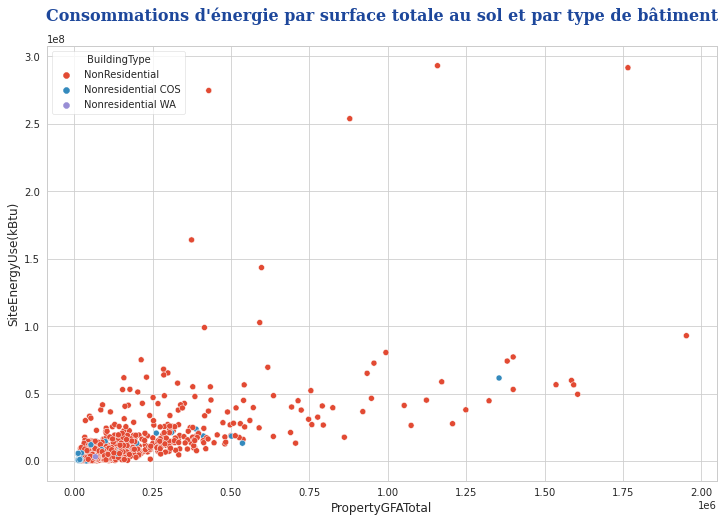

In [ ]:
font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 18,
             }

fig = plt.figure(figsize=(12,8))
sns.scatterplot(data = data, x='PropertyGFATotal', y='SiteEnergyUse(kBtu)', hue='BuildingType')
plt.title(f"Consommations d'énergie par surface totale au sol et par type de bâtiment\n", 
          fontdict=font_title, fontsize=16)
plt.show()


In [ ]:
data[data['SiteEnergyUse(kBtu)']>2.5*10**8]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
131,198,2016,NonResidential,Hospital,Seattle Children's Hospital Main Campus,4800 Sand Point Way NE,Seattle,WA,98105.0,2982800005,4,NORTHEAST,47.662310,-122.281460,1953,6,10,879000,0,879000,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),879000.0,NaN,NaN,10.0,288.799988,293.200012,578.200012,576.599976,253832464.0,257764208.0,0.0,33892500.0,115641210.0,1.381912e+06,138191238.0,False,Compliant,8145.52,9.27
158,276,2016,NonResidential,Hospital,Harborview Medical Center,325 9th Ave.,Seattle,WA,98104.0,8590900220,3,EAST,47.603990,-122.323770,2000,9,8,1158691,0,1158691,"Hospital (General Medical & Surgical), Parking",Hospital (General Medical & Surgical),1350182.0,Parking,387651.0,29.0,217.100006,219.699997,502.899994,502.799988,293090784.0,296671744.0,122575032.0,49438336.0,168683602.0,1.832129e+04,1832129.0,False,Compliant,10734.57,9.26
521,753,2016,NonResidential,Other,WestinBuilding,2001 6th Ave,Seattle,WA,98121.0,0659000950,7,DOWNTOWN,47.614380,-122.338710,1981,1,33,429405,0,429405,"Data Center, Office",Data Center,218997.0,Office,210409.0,98.0,639.700012,639.799988,2007.900024,2008.000000,274682208.0,274725984.0,0.0,80460872.0,274532495.0,1.496720e+03,149672.0,False,Compliant,1921.82,4.48
579,828,2016,NonResidential,Hospital,Swedish First Hill,747 Broadway,Seattle,WA,98122.0,1978201096,3,EAST,47.608951,-122.322402,1994,7,14,1765970,0,1765970,"Hospital (General Medical & Surgical), Parking",Hospital (General Medical & Surgical),1639334.0,Parking,441551.0,54.0,177.899994,180.500000,377.000000,378.399994,291614432.0,295929888.0,134943456.0,40842564.0,139354828.0,1.731612e+05,17316120.0,False,Compliant,12307.16,6.97


In [ ]:
data = data[data['SiteEnergyUse(kBtu)']<2.5*10**8]

On va enlever toutes les données de localisation en les isolant(sans pour autant les supprimer) avant de faire l'éttiquetage des données.

In [ ]:
identification_features = ['OSEBuildingID','PropertyName', 'Address', 'ZipCode']
data_identification = data[identification_features]
data.drop(identification_features, axis=1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Les relevés d'éléctricité étant chers , on supprime les colonnes correspondant à ces relevés.

In [ ]:
data_filter = data.drop(['SteamUse(kBtu)','Electricity(kBtu)',
                         'NaturalGas(kBtu)'], axis=1)

In [ ]:
numerical_features = data_filter.select_dtypes(include=['int64','float64'])
categorical_features = data_filter.select_dtypes(exclude=['int64','float64']) 
categorical_features = categorical_features.drop(['State'], axis=1)

Maintenant regardons les variables numériques

In [ ]:
list(categorical_features)

['BuildingType',
 'PrimaryPropertyType',
 'City',
 'TaxParcelIdentificationNumber',
 'Neighborhood',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'SecondLargestPropertyUseType',
 'DefaultData',
 'ComplianceStatus']

In [ ]:
list(numerical_features.columns)

['DataYear',
 'CouncilDistrictCode',
 'Latitude',
 'Longitude',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'Electricity(kWh)',
 'NaturalGas(therms)',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity']

In [ ]:
numerical_features.isnull().sum()

DataYear                             0
CouncilDistrictCode                  0
Latitude                             0
Longitude                            0
YearBuilt                            0
NumberofBuildings                    0
NumberofFloors                       0
PropertyGFATotal                     0
PropertyGFAParking                   0
PropertyGFABuilding(s)               0
LargestPropertyUseTypeGFA           11
SecondLargestPropertyUseTypeGFA    719
ENERGYSTARScore                    547
SiteEUI(kBtu/sf)                     0
SiteEUIWN(kBtu/sf)                   1
SourceEUI(kBtu/sf)                   0
SourceEUIWN(kBtu/sf)                 0
SiteEnergyUse(kBtu)                  0
SiteEnergyUseWN(kBtu)                1
Electricity(kWh)                     0
NaturalGas(therms)                   0
TotalGHGEmissions                    0
GHGEmissionsIntensity                0
dtype: int64

On supprime des données inutiles et manquantes , comme l'année à laquelle les buildings ont été construits, le score EnergyStar qu'on verra après ainsi que le second type d'usage du building. On crée un nouveau dataframe qui nous servira pour la suite de notre processus.

In [ ]:
energystar_score = numerical_features['ENERGYSTARScore']
numerical_features = numerical_features.drop(['ENERGYSTARScore','DataYear'], axis=1)

In [ ]:
data_filter = pd.concat([categorical_features, numerical_features], axis=1)

<a name="up"></a>
## **Mise en place des jeux d'entrainement et de test**



Maintenant on va splitter le jeu données en  un jeu d'entrainement et un jeu de test (20% des données).

On fait cela pour voir si nos modèles peuvent s'applquer au delà de nos jeux de données. 

[Documentation](https://openclassrooms.com/fr/courses/4297211-evaluez-les-performances-dun-modele-de-machine-learning/4308241-mettez-en-place-un-cadre-de-validation-croisee)

In [ ]:
from sklearn.model_selection import train_test_split

X = data_filter.drop(['TotalGHGEmissions','SiteEnergyUse(kBtu)'], axis=1)
Y = data_filter[['TotalGHGEmissions','SiteEnergyUse(kBtu)']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Entrainement: {} lignes,\nTest: {} lignes.\n".format(X_train.shape[0],
                                                            X_test.shape[0]))
target_features = ['BuildingType','PrimaryPropertyType','Neighborhood','LargestPropertyUseType']

Entrainement: 1253 lignes,
Test: 314 lignes.



<a name="hp"></a>
##Normalisation des données:

La consommation de CO2 et l'utilisation de l'énergie ayant des valeurs très élevées, on va standardiser leurs valeurs via une transformation logarithmique qui est effectuée ci-dessous.

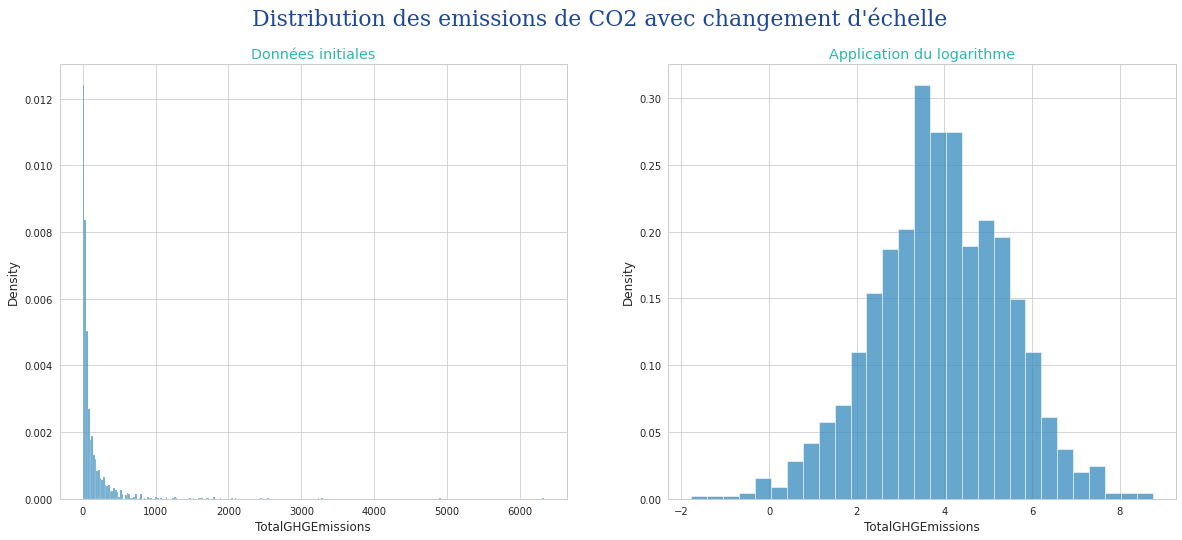

In [ ]:
from sklearn.preprocessing import FunctionTransformer

logtransformer = FunctionTransformer(np.log, inverse_func = np.exp, check_inverse = True)
Y_trainlog = logtransformer.transform(Y_train)

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.histplot(data=Y_train, x='TotalGHGEmissions', stat="density", ax=axes[0])
axes[0].set_title("Données initiales", color='#2cb7b0')
sns.histplot(data=Y_trainlog, x='TotalGHGEmissions', stat="density", ax=axes[1])
axes[1].set_title("Application du logarithme", color='#2cb7b0')
plt.suptitle("Distribution des emissions de CO2 avec changement d'échelle", fontdict=font_title, fontsize=22)
plt.show()

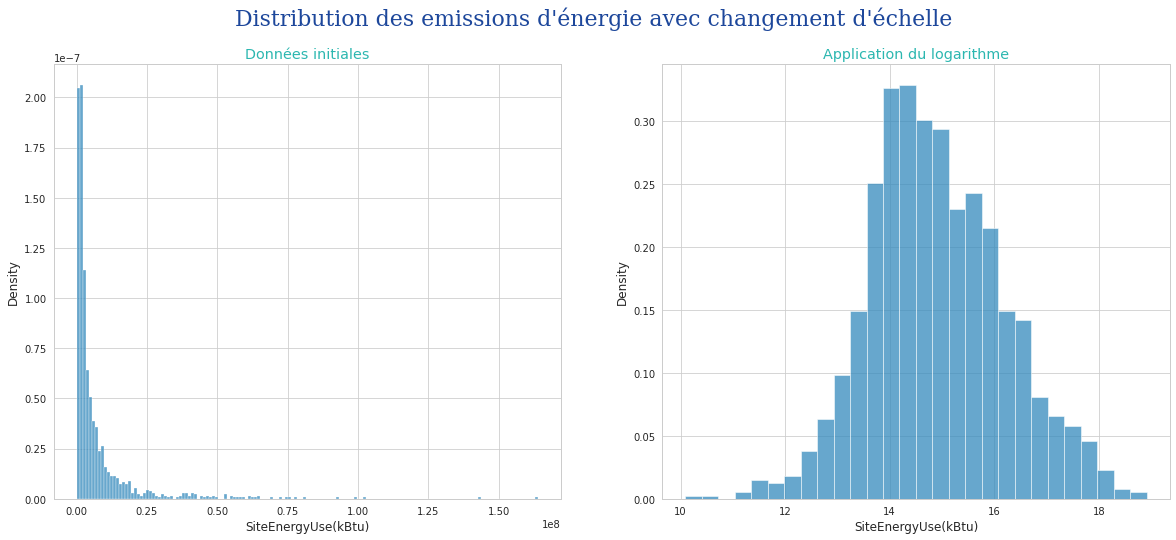

In [ ]:
from sklearn.preprocessing import FunctionTransformer

logtransformer = FunctionTransformer(np.log, inverse_func = np.exp, check_inverse = True)
Y_trainlog = logtransformer.transform(Y_train)

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.histplot(data=Y_train, x='SiteEnergyUse(kBtu)', stat="density", ax=axes[0])
axes[0].set_title("Données initiales", color='#2cb7b0')
sns.histplot(data=Y_trainlog, x='SiteEnergyUse(kBtu)', stat="density", ax=axes[1])
axes[1].set_title("Application du logarithme", color='#2cb7b0')
plt.suptitle("Distribution des emissions d'énergie avec changement d'échelle", fontdict=font_title, fontsize=22)
plt.show()

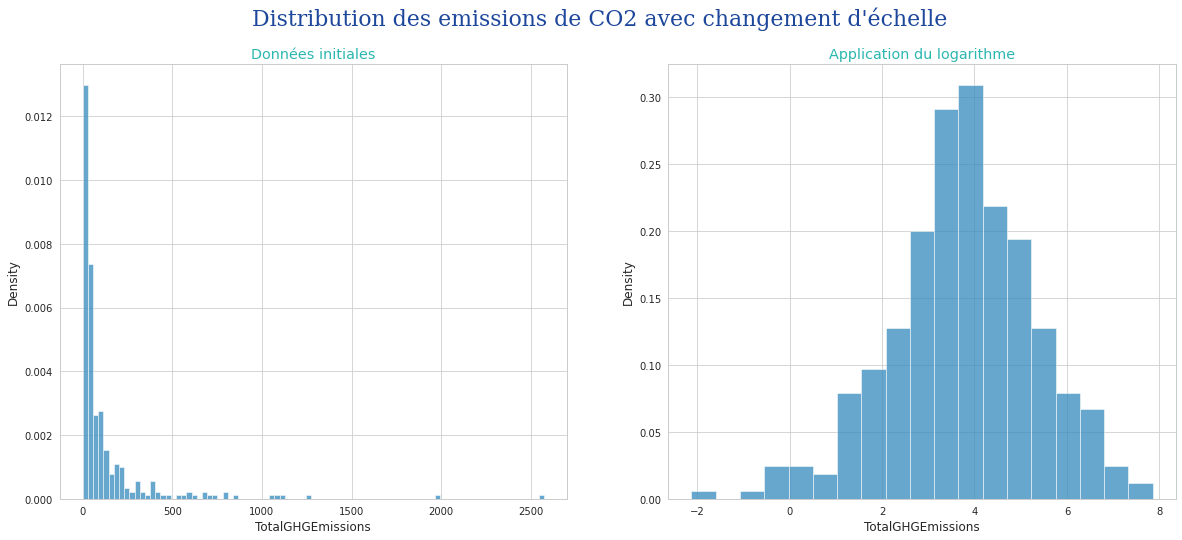

In [ ]:
from sklearn.preprocessing import FunctionTransformer

logtransformer = FunctionTransformer(np.log, inverse_func = np.exp, check_inverse = True)
Y_testlog = logtransformer.transform(Y_test)

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.histplot(data=Y_test, x='TotalGHGEmissions', stat="density", ax=axes[0])
axes[0].set_title("Données initiales", color='#2cb7b0')
sns.histplot(data=Y_testlog, x='TotalGHGEmissions', stat="density", ax=axes[1])
axes[1].set_title("Application du logarithme", color='#2cb7b0')
plt.suptitle("Distribution des emissions de CO2 avec changement d'échelle", fontdict=font_title, fontsize=22)
plt.show()

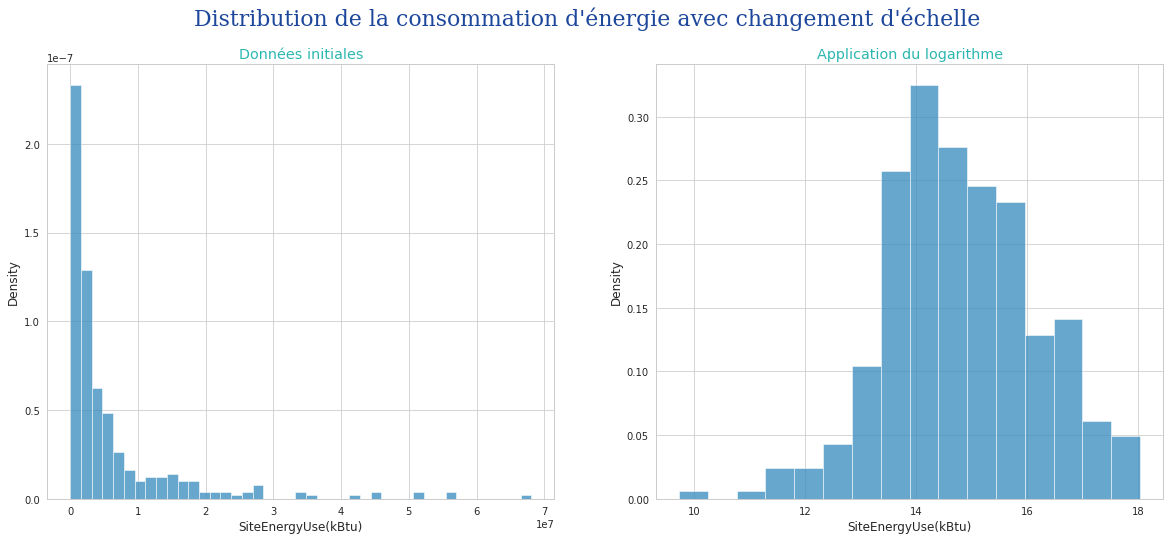

In [ ]:
from sklearn.preprocessing import FunctionTransformer

logtransformer = FunctionTransformer(np.log, inverse_func = np.exp, check_inverse = True)
Y_testlog = logtransformer.transform(Y_test)

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.histplot(data=Y_test, x='SiteEnergyUse(kBtu)', stat="density", ax=axes[0])
axes[0].set_title("Données initiales", color='#2cb7b0')
sns.histplot(data=Y_testlog, x='SiteEnergyUse(kBtu)', stat="density", ax=axes[1])
axes[1].set_title("Application du logarithme", color='#2cb7b0')
plt.suptitle("Distribution de la consommation d'énergie avec changement d'échelle", fontdict=font_title, fontsize=22)
plt.show()

On voit donc que nos deux features ont chacune une distribution désormais normale.

<a name="CV"></a>
##Encodage

Pour l'encodage on va utiliser la méthode [TargetEncoder](https://maxhalford.github.io/blog/target-encoding/#:~:text=Target%20encoding%20is%20good%20because,a%20name%3A%20over%2Dfitting.).


Explication du Target Encoding : On compte le nombre d'occurences d'une variable ayant pour target 1 et on calcule le pourcentage de ces occurences par rapport au nombre d'occurences totale de cette variable peu importe la valeur du target, et on remplace ensuite la variable (ex : 'chat') par son pourcentage.

On le choisit pour sa simplicité comparé à des méthodes comme le One Hot Encoding ou il faut remplacer les variables catégorielles par des zéros et des un. Le Target Encoding me semble plus efficace et adapté à notre problématique.





In [ ]:
import category_encoders as ce

from category_encoders import TargetEncoder

encoder = TargetEncoder()

for col in categorical_features:
   X_train[col] = encoder.fit_transform(X_train[col], Y_trainlog['TotalGHGEmissions'])
   X_test[col] = encoder.fit_transform(X_test[col], Y_testlog['TotalGHGEmissions'])

display(X_train)
_

/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


,BuildingType,PrimaryPropertyType,City,TaxParcelIdentificationNumber,Neighborhood,ListOfAllPropertyUseTypes,LargestPropertyUseType,SecondLargestPropertyUseType,DefaultData,ComplianceStatus,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUseWN(kBtu),Electricity(kWh),NaturalGas(therms),GHGEmissionsIntensity
417,3.897671,4.926449,3.920268,3.917895,4.327751,3.271867,3.823067,3.649370,3.929792,1.350167,2,47.59878,-122.33458,1913,5,7,154159,0,154159,193154.0,NaN,58.000000,58.799999,28.000000,28.700001,1.134876e+07,471503.00000,3430.500488,0.19
884,3.897671,3.606201,3.920268,3.917895,4.246615,3.917895,3.630473,4.232851,3.929792,3.950163,4,47.63246,-122.32658,1993,1,3,25194,3764,21430,10751.0,8044.0,87.699997,92.400002,184.699997,188.000000,1.980961e+06,278437.50000,9287.139648,2.22
415,3.897671,2.953362,3.920268,3.917895,3.355159,2.702149,3.006417,3.649370,3.929792,3.950163,2,47.55515,-122.32750,1974,1,1,93020,0,93020,93020.0,NaN,13.500000,13.500000,42.299999,42.299999,1.252324e+06,367035.09380,0.000000,0.09
58,3.897671,4.250640,3.920268,3.917895,4.327751,3.128218,3.160527,3.649370,3.929792,3.950163,7,47.61500,-122.33081,1930,1,2,67224,0,67224,67224.0,NaN,19.500000,19.500000,61.200001,61.200001,1.310237e+06,384008.31250,0.000000,0.14
356,3.897671,3.606201,3.920268,3.917895,3.911710,3.599087,3.630473,3.547589,3.929792,1.350167,4,47.66178,-122.31812,1987,1,2,69492,0,69492,69800.0,0.0,4.600000,4.600000,14.300000,14.300000,3.189628e+05,93482.60156,0.000000,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,3.897671,3.072620,3.920268,3.917895,3.355159,3.072683,3.081986,3.752756,3.929792,3.950163,2,47.58517,-122.32853,1966,1,1,28144,0,28144,22201.0,6087.0,30.400000,30.799999,91.699997,92.199997,8.701271e+05,237500.00000,483.509979,0.29
1299,3.897671,2.953362,3.920268,3.917895,3.355159,3.514944,3.006417,3.752756,3.929792,3.950163,2,47.55544,-122.33294,1960,1,1,25000,0,25000,24000.0,1000.0,11.500000,13.700000,24.100000,26.100000,3.426963e+05,42144.60156,1433.350098,0.34
865,3.897671,4.071625,3.920268,3.917895,4.327751,3.471874,4.525018,3.752756,3.929792,3.950163,7,47.61113,-122.34556,1990,1,4,82065,34800,47265,36036.0,27594.0,41.299999,43.799999,129.800003,137.500000,1.818635e+06,503262.18750,0.000000,0.15
1465,3.897671,4.203152,3.920268,3.917895,3.911710,4.212413,4.203152,3.649370,3.929792,3.950163,4,47.66368,-122.27324,1924,1,3,97500,0,97500,97500.0,NaN,38.299999,44.299999,59.799999,66.800003,4.314754e+06,266910.18750,28262.621090,1.60


DataYear                             0
CouncilDistrictCode                  0
Latitude                             0
Longitude                            0
YearBuilt                            0
NumberofBuildings                    0
NumberofFloors                       0
PropertyGFATotal                     0
PropertyGFAParking                   0
PropertyGFABuilding(s)               0
LargestPropertyUseTypeGFA           11
SecondLargestPropertyUseTypeGFA    719
ENERGYSTARScore                    547
SiteEUI(kBtu/sf)                     0
SiteEUIWN(kBtu/sf)                   1
SourceEUI(kBtu/sf)                   0
SourceEUIWN(kBtu/sf)                 0
SiteEnergyUse(kBtu)                  0
SiteEnergyUseWN(kBtu)                1
Electricity(kWh)                     0
NaturalGas(therms)                   0
TotalGHGEmissions                    0
GHGEmissionsIntensity                0
dtype: int64

In [ ]:
for col in X_train:
  
  X_train[col].fillna(value=X_train[col].mean() , inplace=True) 


for col in X_test:
  
  X_test[col].fillna(value=X_test[col].mean() , inplace=True) 

In [ ]:
pd.DataFrame(Y_trainlog).to_csv("/content/drive/MyDrive/Y_trainlog.csv", sep='\t')
pd.DataFrame(Y_testlog).to_csv("/content/drive/MyDrive/Y_testlog.csv", sep='\t')

In [ ]:
pd.DataFrame(X_train).to_csv("/content/drive/MyDrive/X_trainlog.csv", sep='\t')
pd.DataFrame(X_test).to_csv("/content/drive/MyDrive/X_testlog.csv", sep='\t')


In [ ]:
Y_train

,TotalGHGEmissions,SiteEnergyUse(kBtu)
417,29.43,1.119592e+07
884,55.95,1.878743e+06
415,8.73,1.252324e+06
58,9.13,1.310237e+06
356,2.22,3.189628e+05
...,...,...
1135,8.22,8.587010e+05
1299,8.61,2.871325e+05
865,11.97,1.717131e+06
1465,156.45,3.736960e+06
